# 1. Problem Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

**Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.**

## Objective
Predict survival on Titanic

# 2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
train = pd.read_csv(os.path.abspath('./datasets/train.csv'))
test = pd.read_csv(os.path.abspath('./datasets/test.csv'))
full = train.append(test, ignore_index=True)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Variable description

- Survived: either one (1) or zero (0). Zero for died.
- Age: passenger's age.
- Cabin: the cabin of passenger.
- Fare: ticket fare
- Name: passenger's name
- Sex: gender
- Ticket: ticket ID
- SibSp: number of siblings or spouses
- Embarked: port of embarkation
- Pclass: passenger's class

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some points from the stats table:
- 177 passengers records contain null age.
- Only 38.3% survived the disaster.
- Average ticket price is $32.3

## Helper functions here

In [4]:
def plot_correlation_map(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(12,10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, center=0,
            square=True, cbar_kws={"shrink": 1}, annot=True, annot_kws={'fontsize': 12})
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

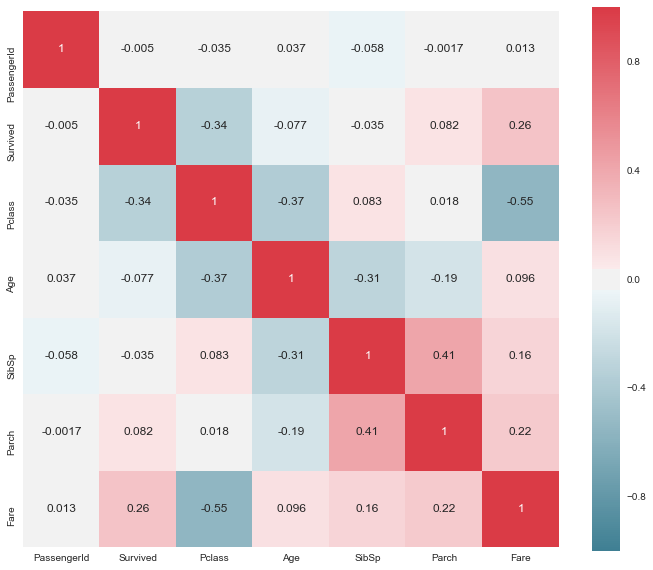

In [5]:
plot_correlation_map(train)

The Pclass attribute has a negative correlation with Fare, indicating that higher Pclass leads to cheaper Titanic fare.

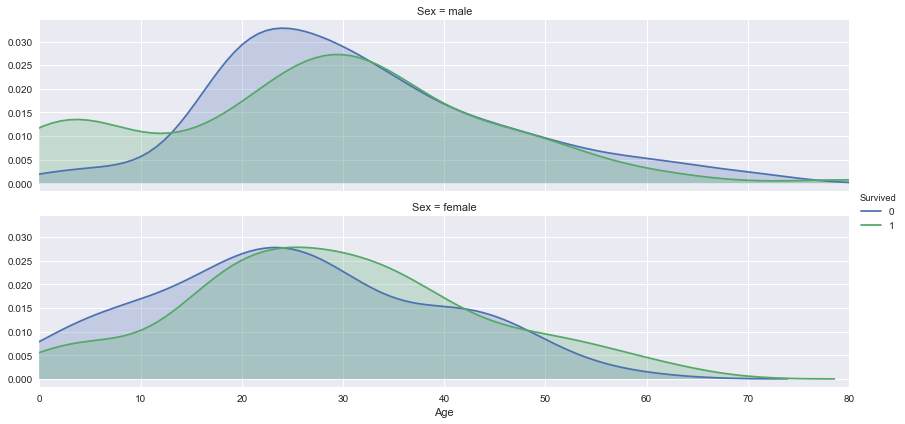

In [6]:
plot_distribution(train, 'Age', 'Survived', row = 'Sex')

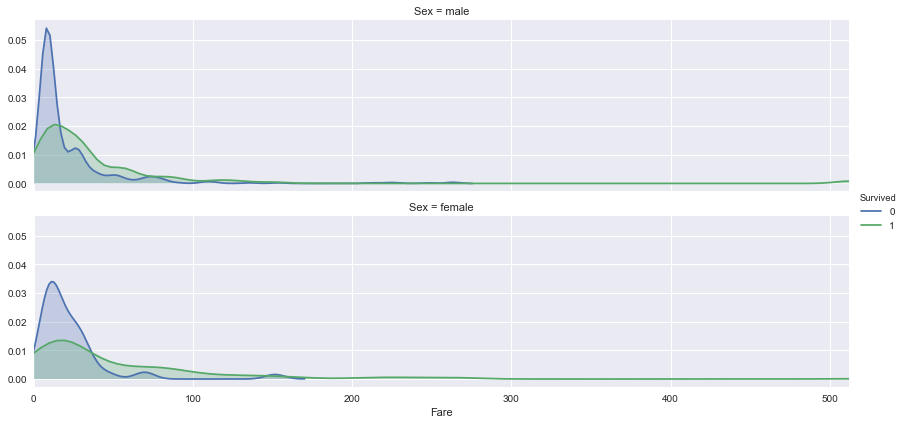

In [7]:
plot_distribution(train, 'Fare', 'Survived', row='Sex')

# 3. Data Preparation

## Transform categorical variables into numeric

In [8]:
# Transform sex into binary values
sex = pd.Series(np.where(full['Sex'] == 'male', 1, 0), name='Sex')
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [9]:
# Create a new attribute for every unique value of Embarked
embarked = pd.get_dummies(full['Embarked'], prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
# Create a new variable for every unique value of Pslass
pclass = pd.get_dummies(full.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [11]:
## Fill missing values in variables
imputed = pd.DataFrame()
imputed['Age'] = full.Age.fillna(full.Age.mean())
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## Define titles based on passenger's names

In [12]:
full.Name.head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [13]:
get_title = lambda name: name.split(',')[1].split('.')[0].strip()
titles = full.Name.map(get_title)
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
title_dictionary = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Ms',
    'Ms': 'Ms',
    'Don': 'Royalty',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Mme': 'Mrs',
    'Major': 'Officer',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Mlle': 'Ms',
    'Col': 'Officer',
    'Capt': 'Officer',
    'Master': 'Mr',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty',
    'Dona': 'Royalty'
}
len(title_dictionary.keys()) == len(titles.unique()) # completeness check

True

In [15]:
titles = titles.map(title_dictionary)
titles = pd.get_dummies(titles)
titles.head()

,Mr,Mrs,Ms,Officer,Royalty
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


## Extract cabin category from the cabin number

In [16]:
full.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [17]:
cabin = pd.DataFrame()
cabin['Cabin'] = full.Cabin.fillna('U')
cabin['Cabin'] = cabin.Cabin.map(lambda c: c[0]) # get the first character
cabin.head()

,Cabin
0,U
1,C
2,U
3,C
4,U


In [18]:
cabin = pd.get_dummies(cabin.Cabin, prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [19]:
cabin[cabin.Cabin_U == 1].shape # 1014 unknown cabins

(1014, 9)

## Extract ticket information from ticket number

In [20]:
full.Ticket.head() # show sample

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [21]:
def clean_ticket(ticket=''):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    return ticket[0] if len(ticket) > 0 else 'XXX'

In [22]:
ticket = pd.DataFrame()
ticket['Ticket'] = full.Ticket.map(clean_ticket)
ticket = pd.get_dummies(ticket.Ticket, prefix = 'Ticket')
print(ticket.shape)
ticket.head()

(1309, 37)


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Create family size category

In [23]:
full.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [24]:
family = pd.DataFrame()
family['Size'] = full.Parch + full.SibSp + 1 # plus one to include the passenger

family['Family_Single'] = family['Size'].map(lambda s: 1 if s == 1 else 0)

family['Family_Small'] = family['Size'].map(lambda s: 1 if (s >= 2 and s <= 4) else 0)

family['Family_Large'] = family['Size'].map(lambda s: 1 if s > 5 else 0)

In [25]:
family.head()

,Size,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


## Assemble final dataset for modelling

In [26]:
full_x = pd.concat([imputed, embarked, cabin, sex, family.iloc[:, 1:], ticket, titles], axis=1)
print(full_x.shape)
print(list(full_x))
full_x.head()

(1309, 60)
['Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Sex', 'Family_Single', 'Family_Small', 'Family_Large', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'Mr', 'Mrs', 'Ms', 'Officer', 'Royalty']


,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Mr,Mrs,Ms,Officer,Royalty
0,22.0,7.2500,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,71.2833,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [28]:
train_x_full = full.loc[0:891]
train_y_full = train_x.Survived

test_x = full.loc[891:]
test_y = test_x.Survived

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x_full, train_y_full, test_size=0.3)
print(train_x_full.shape, train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape)

NameError: name 'train_x' is not defined